# METAC DATA PREP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import math
import os
import glob

# Load Data

- [x] behavioural data (Island Jumping Task)
- [ ] physiological data (Island Jumping Task)
- [ ] questionnaire data

In [2]:
# load physiology data

# load questionnaire data


In [10]:
## BEHAVIOURAL DATA

ids = ["9004", "9006", "9009", "9010", "9011", "9012", "9013"]
# data not yet transferred:
# incomplete internal pilot data sets: 9003, 9007, 9008

# path root
basedir = r"T:\METAC\behavior\raw\Temporary"

# init array
f = list()
d = []
dat = []

# loop over ppids
for idx, val in enumerate(ids):
    
    # get path to .csv task files
    ppid = "TNU_METAC_" + val
    taskfname = "behavior\\task\\*.csv"
    fullpath = os.path.join(basedir, ppid, taskfname)
    
    # load task data (experiment)
    for file in glob.glob(fullpath):
        if file.find("experiment") != -1:
    
            # aversiveness rating
            try:
                aversiveness = pd.read_csv(file, skiprows=range(83))
                av = aversiveness.to_numpy()
            except:
                av = math.nan
    
            print(av)
    
            # task settings
            specifications = pd.read_csv(file, nrows=1)
            specifications.insert(0, "id", idx) # add sub idx
            specifications.insert(15, "aversiveness", av) # add aversiveness rating
    
            # repeat rows
            specs80 = pd.DataFrame(np.repeat(specifications.values, specifications.values[0,1], axis=0))
            specs80.columns = specifications.columns
            print(specs80.shape)
            
            tmp_specs = specifications.to_numpy()
            tmp_specs = np.repeat(tmp_specs, repeats = specifications.values[0,1], axis=0)
    
            # responses
            data = pd.read_csv(file, skiprows=[0,1,83,84])
            print(data.shape)
    
            # concatenate arrays
            # dat = np.concatenate([data, tmp_specs], axis=1)
            dat = pd.concat([data, specs80], axis=1)
            print(dat.shape)
            
            # d.update({str(idx): dat})
            f.append(dat)

# concatenate data frames from individual subjects
df = pd.concat(f, ignore_index=True)
print(df.shape)

[[0.7]]
(80, 16)
(80, 11)
(80, 27)
[[0.7]]
(80, 16)
(80, 11)
(80, 27)
[[0.8]]
(80, 16)
(80, 11)
(80, 27)
[[0.498534]]
(80, 16)
(80, 11)
(80, 27)
[[0.364614]]
(80, 16)
(80, 11)
(80, 27)
nan
(80, 16)
(80, 11)
(80, 27)
[[0.403715]]
(80, 16)
(80, 11)
(80, 27)
(560, 27)


,trial#,iWidth,iDistance,wind,jAngle,jStrengthFactor,jSuccess,prediction,control,tStart,...,angleLimit,distanceMin,distanceMax,widthS,widthL,jumpStrength,windStrength,sceneWidth,sceneHeight,aversiveness
0,1,0.17,0.58,0.0,45,0.750000,1,0.275000,0.750000,24/04/24 15:54:41,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
1,2,0.17,0.41,0.0,45,0.450000,1,0.250000,0.850000,24/04/24 15:55:17,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
2,3,0.17,0.39,0.0,45,0.300000,0,0.725000,0.500000,24/04/24 15:55:48,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
3,4,0.17,0.52,0.0,45,0.700000,0,0.300000,0.600000,24/04/24 15:56:29,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
4,5,0.17,0.59,0.0,45,0.750000,1,0.325000,0.850000,24/04/24 15:57:03,...,0,0.3,0.7,0.07,0.17,0.85,0.1,1920,1057,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,76,0.07,0.54,0.0,45,0.621701,1,0.124145,0.951124,24/06/05 14:42:48,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,0.403715
556,77,0.07,0.52,0.0,45,0.561095,1,0.605083,0.723363,24/06/05 14:43:21,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,0.403715
557,78,0.17,0.36,-0.1,45,0.358749,0,0.624633,0.583578,24/06/05 14:43:58,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,0.403715
558,79,0.17,0.36,0.1,45,0.417400,0,0.859238,0.786901,24/06/05 14:44:33,...,0,0.3,0.7,0.07,0.17,0.85,0.1,2048,1152,0.403715


In [4]:
# Seaborn: apply the default theme
sns.set_theme()

# print column names of df
df.columns

Index(['trial#', ' iWidth', ' iDistance', ' wind', ' jAngle',
       ' jStrengthFactor', ' jSuccess', ' prediction', ' control', ' tStart',
       ' b1Duration', 'id', 'trialNo', ' jumpOnly', ' sequence', ' lang',
       ' mode', ' angleLimit', ' distanceMin', ' distanceMax', ' widthS',
       ' widthL', ' jumpStrength', ' windStrength', ' sceneWidth',
       ' sceneHeight', 'aversiveness'],
      dtype='object')

&nbsp;
### Raw Behavioural Responses over trials

- success
- prediction
- control rating

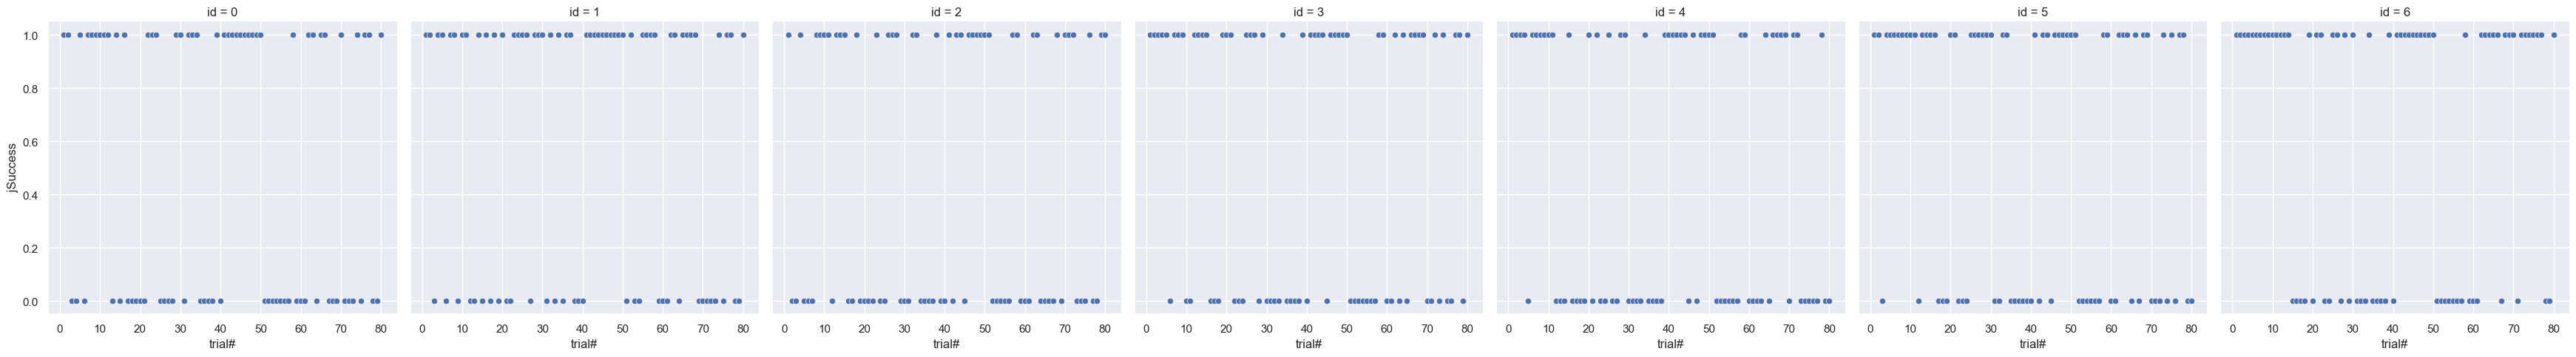

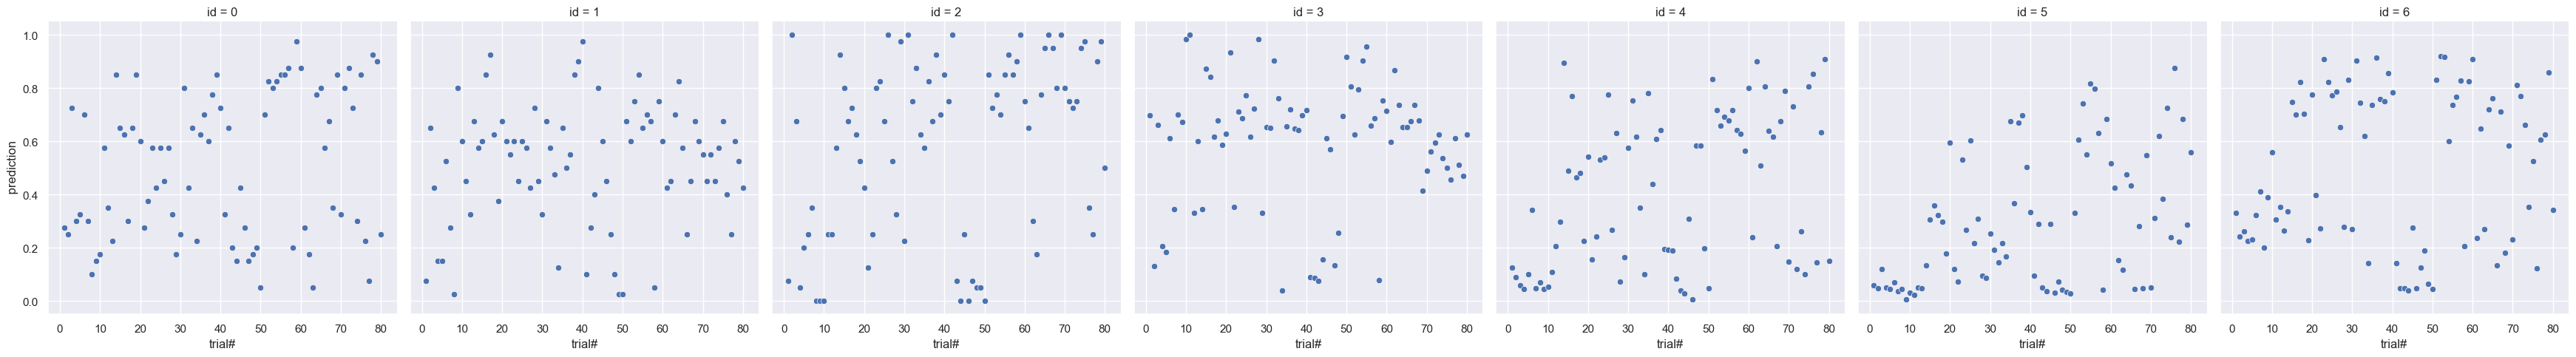

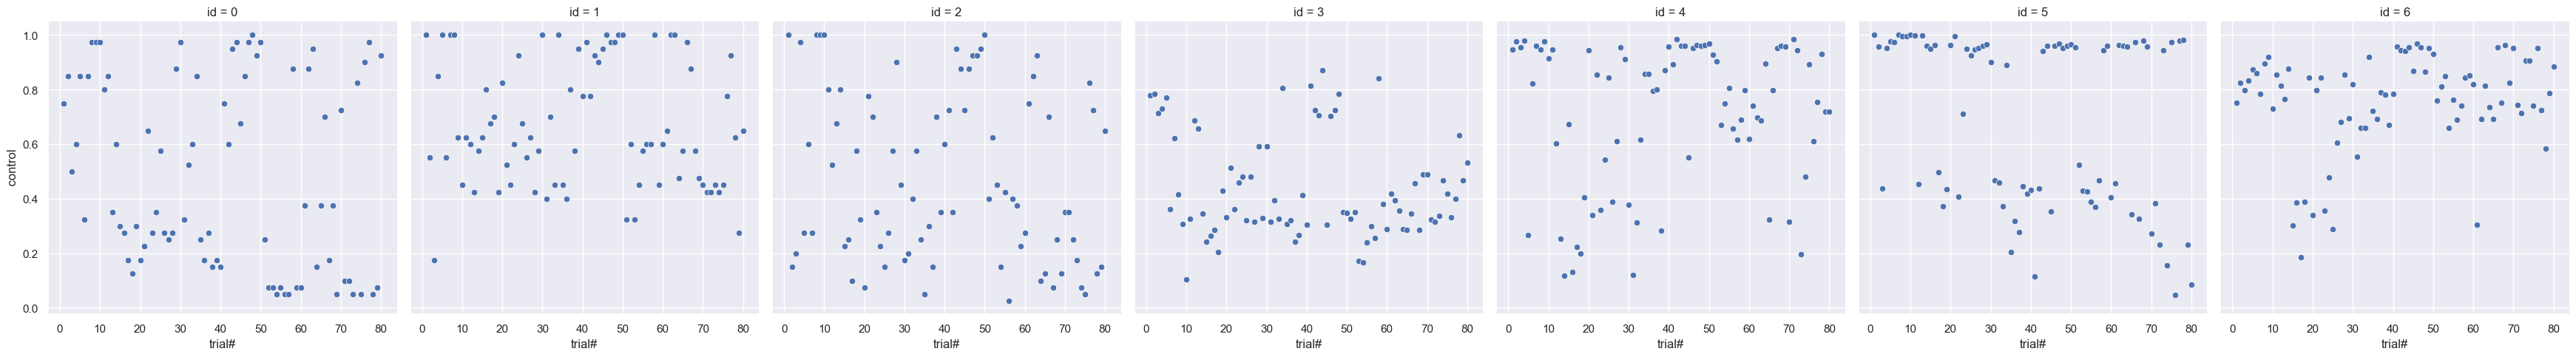

In [5]:
# Create a visualization
sns.relplot(data=df, x="trial#", y=" jSuccess", col="id")
sns.relplot(data=df, x="trial#", y=" prediction", col="id")
sns.relplot(data=df, x="trial#", y=" control", col="id")

### Dependence of subsequent responses

- button box ids 0-2
- slider ids 3-5


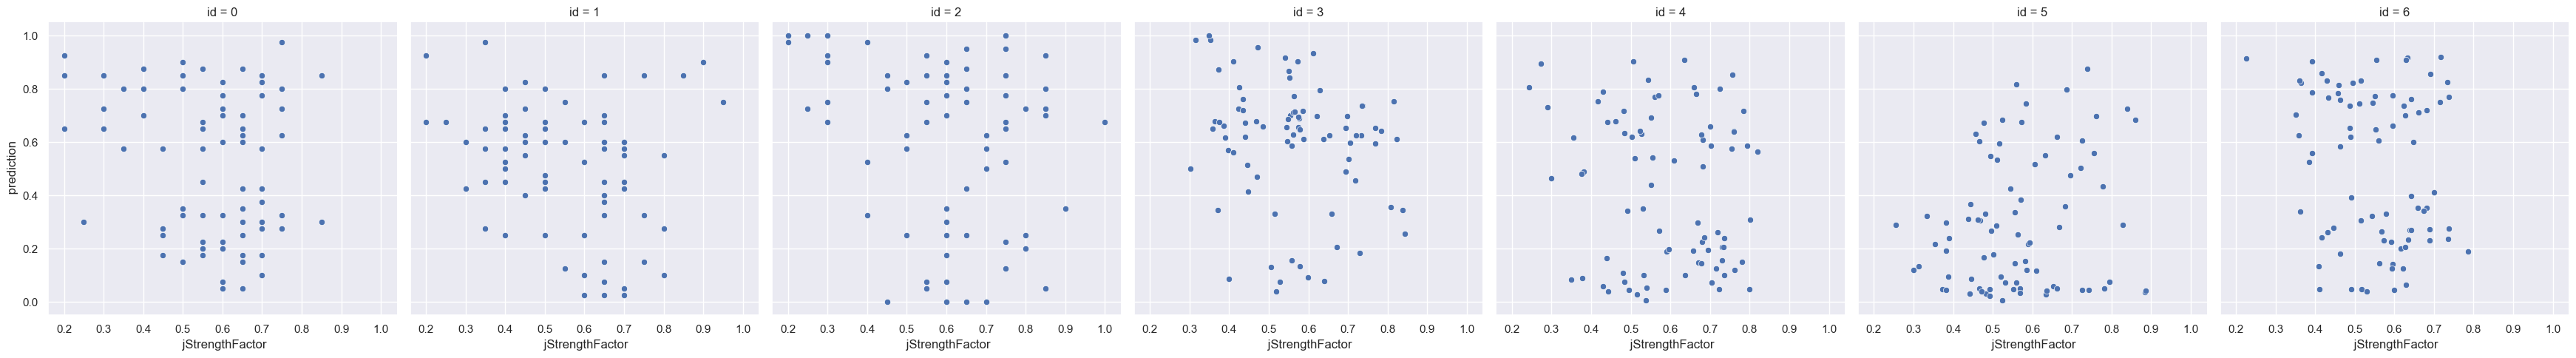

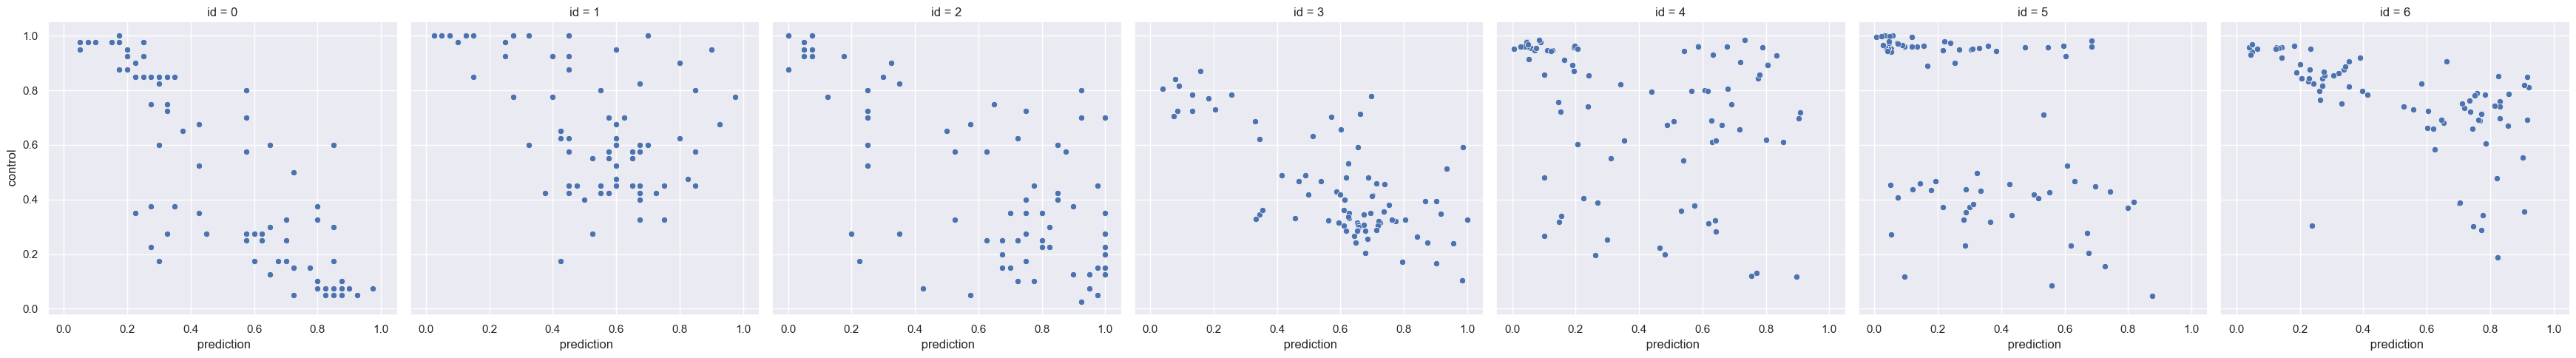

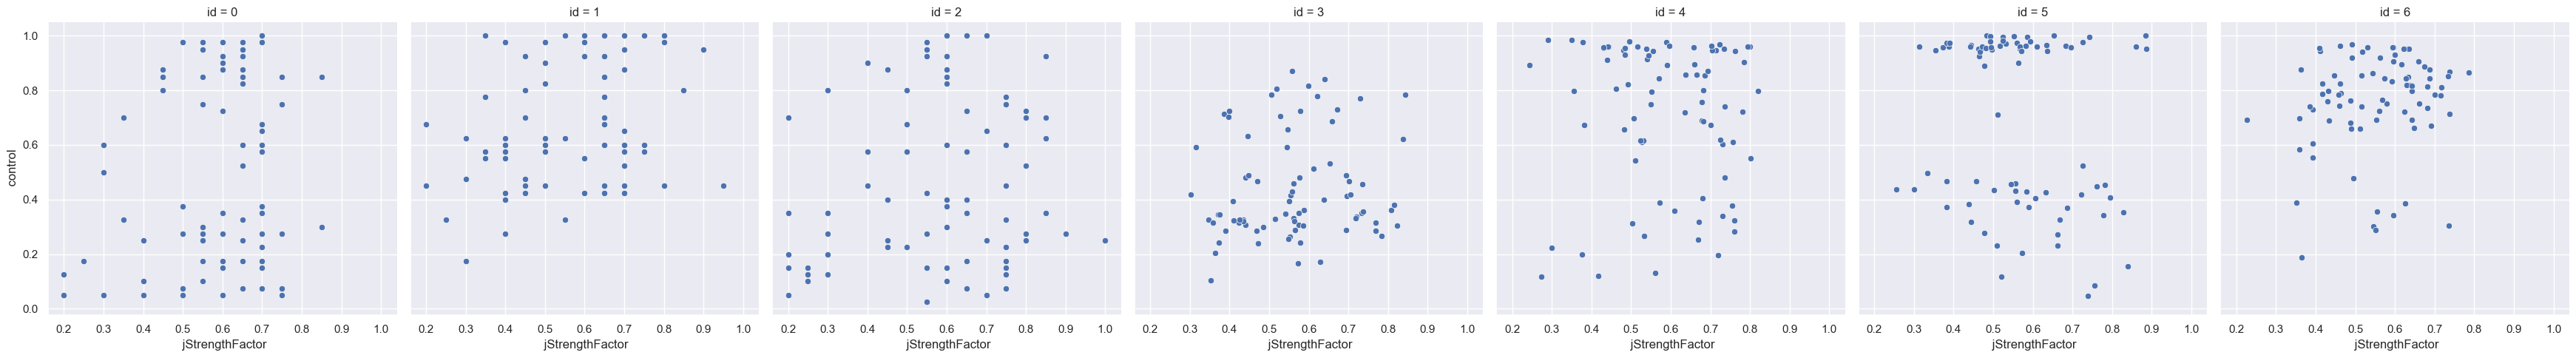

In [7]:
# Create a visualization of subsequent responses
sns.relplot(data=df, x=" jStrengthFactor", y=" prediction", col="id")
sns.relplot(data=df, x=" prediction", y=" control", col="id")
sns.relplot(data=df, x=" jStrengthFactor", y=" control", col="id")

### Average responses (across sub) over trials

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

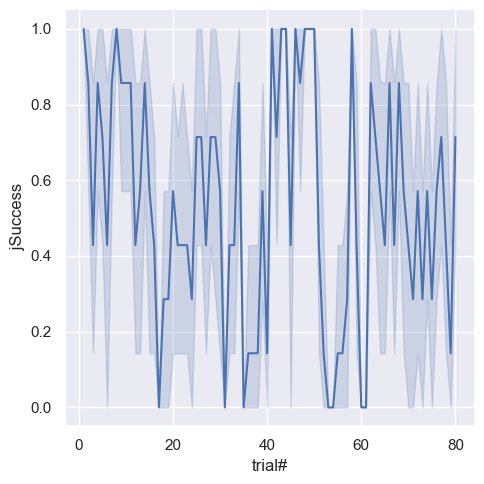

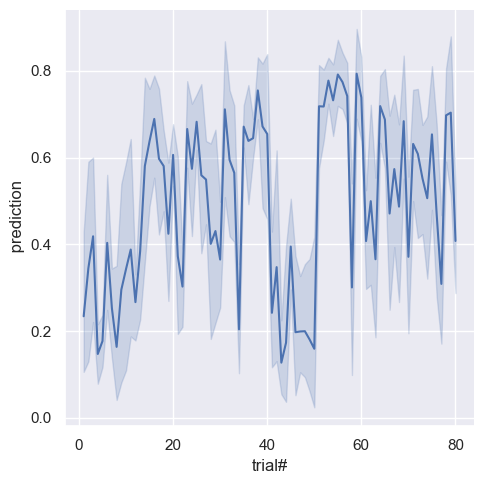

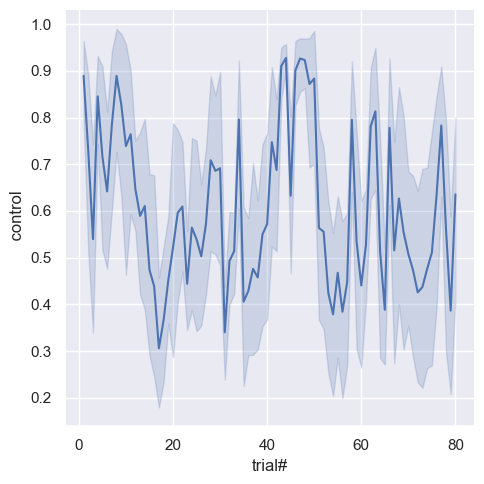

In [8]:
# Avg success (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" jSuccess")

# Avg prediction (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" prediction")

# Avg control rating (across sub) over trials
sns.relplot(data=df, kind="line", x="trial#", y=" control")

### Distribution of task performance and responses

C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\alhess\anaconda3\envs\metac\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a le

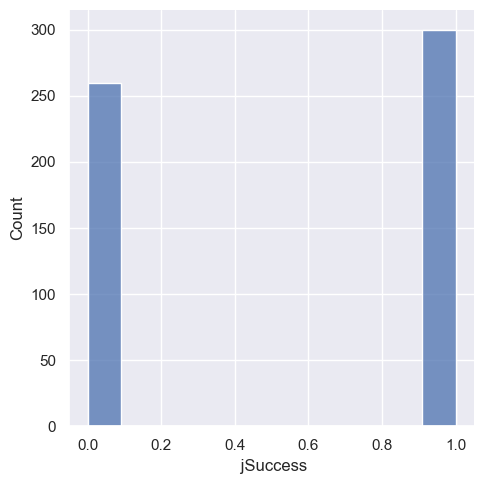

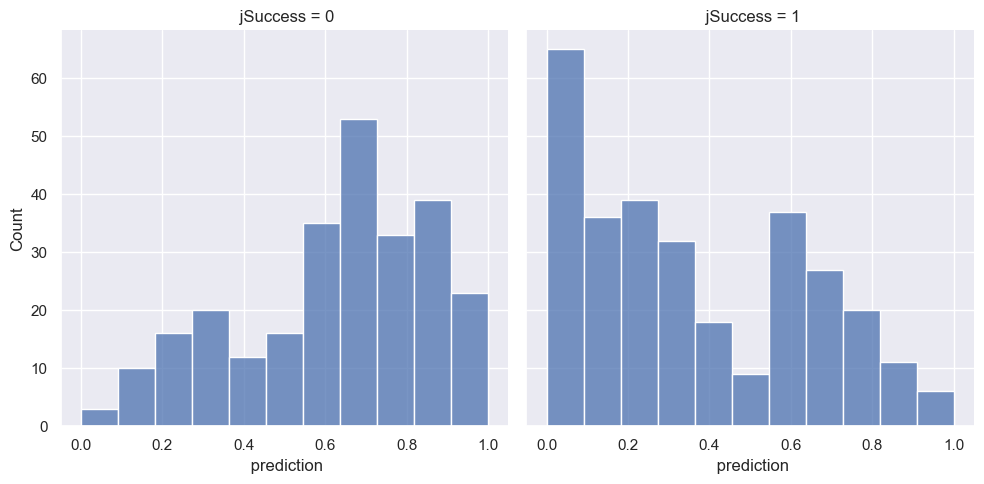

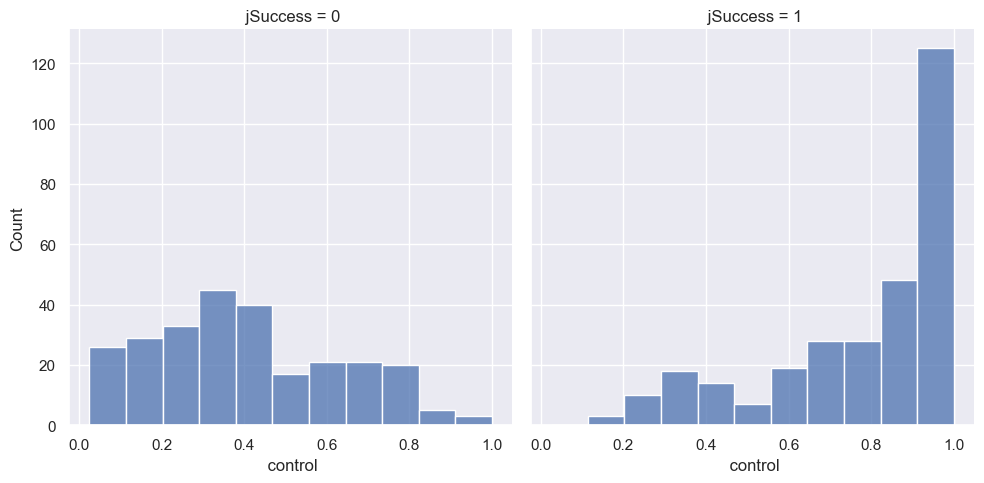

In [9]:
# distr of success/failures
sns.displot(data=df, x=" jSuccess")

# distr of predictions 
sns.displot(data=df, x=" prediction", col=" jSuccess")

# distr of control ratings
sns.displot(data=df, x=" control", col=" jSuccess")

&nbsp;
___
# Questionnaire data


In [27]:
# check out sns.jointplot & sns.pairplot (https://seaborn.pydata.org/tutorial/introduction.html)

